## Importing Libraries

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

### Loading Model

In [3]:
model  = tf.keras.models.load_model('trained_model.keras')

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

In [4]:
import os
print(os.listdir())


['.DS_Store', 'requirements.txt', 'test', 'Test_Plant_Disease.ipynb', 'train', 'trained_model.keras', 'training_hist.json', 'Train_plant_disease.ipynb', 'valid']


### Visualizaing Single Image of Test set

In [ ]:
!pip install opencv-python

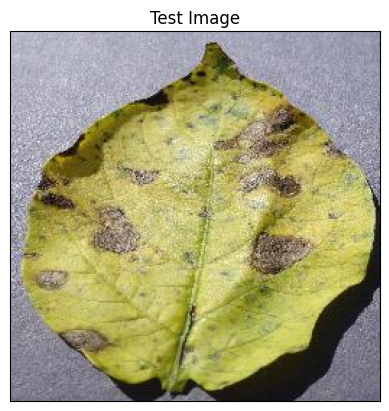

In [ ]:
imp # type: ignoreort cv2
image_path = "test/test/PotatoEarlyBlight4.JPG"
#Reading Image
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Convert BGR image to RGB

#Displaying Image
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [12]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128, 128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr]) #Convert single image to a batch
print(input_arr.shape)

(1, 128, 128, 3)


In [13]:
prediction = model.predict(input_arr)
prediction,prediction.shape

1/1 [==============================] - 0s 31ms/step


(array([[2.6701699e-10, 4.1890362e-18, 3.2053633e-15, 1.5593794e-12,
         7.1190558e-17, 3.6308348e-12, 7.7519397e-15, 1.6991232e-13,
         9.8998179e-12, 9.3440937e-16, 8.4404211e-18, 4.1613508e-20,
         3.5448041e-17, 3.8663763e-15, 1.6621063e-18, 1.6585420e-16,
         3.8183139e-16, 1.7266300e-18, 1.3757471e-14, 6.7517647e-14,
         1.0000000e+00, 3.1656173e-14, 1.7887805e-10, 8.2489971e-16,
         1.3577230e-15, 4.6197597e-14, 4.2680747e-14, 8.3581222e-15,
         1.9668101e-18, 2.9129774e-15, 6.1006977e-11, 8.2971290e-15,
         3.3918438e-13, 1.8941335e-19, 3.2611965e-16, 3.9344209e-20,
         2.7053440e-20, 8.6885828e-12]], dtype=float32),
 (1, 38))

In [14]:
result_index = np.argmax(prediction)
result_index

20

In [17]:
class_name = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy'
 ]

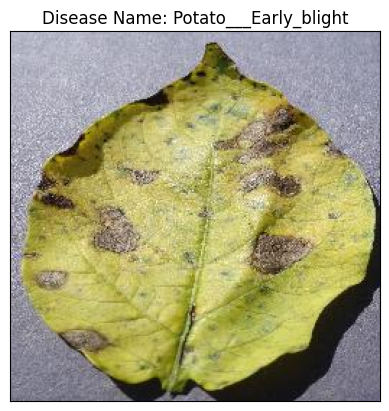

In [18]:
#Displaying Result of disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

In [19]:
model_prediction

'Potato___Early_blight'